In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

# Separate features and target
X = df.drop('quality', axis=1).values
y = df['quality'].values

# Define k-Fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in kf.split(X):
    # Split into train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Test model
    y_pred = model.predict(X_test)

    # Store accuracy for this fold
    accuracies.append(accuracy_score(y_test, y_pred))

# Print accuracies for all folds
for i, acc in enumerate(accuracies, 1):
    print(f"Accuracy for fold {i}: {acc:.2f}")

# Print average accuracy
print(f"\nAverage Accuracy: {np.mean(accuracies):.2f}")


Accuracy for fold 1: 0.69
Accuracy for fold 2: 0.71
Accuracy for fold 3: 0.69
Accuracy for fold 4: 0.69
Accuracy for fold 5: 0.67

Average Accuracy: 0.69


Average Accuracy: 0.46


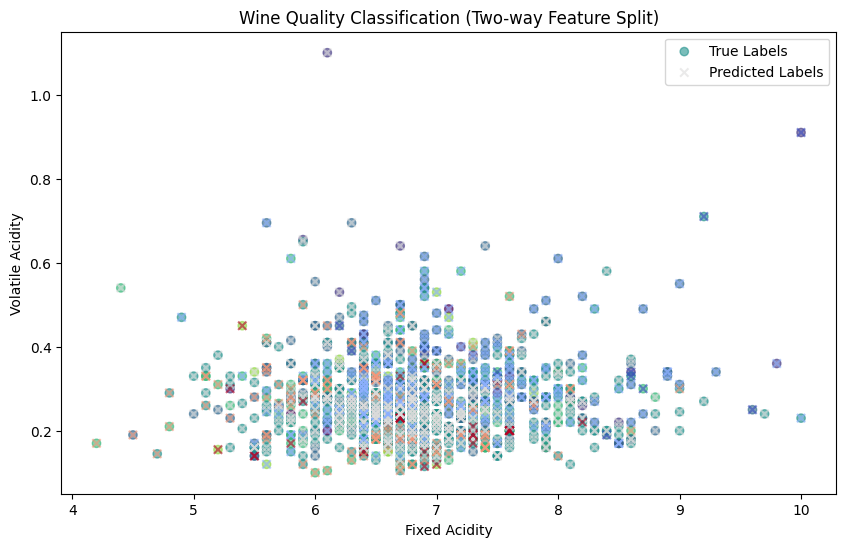

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

# Separate features and target
X = df.drop('quality', axis=1).values
y = df['quality'].values

# Use only the first two features for 2D visualization
X_2d = X[:, :2]  # fixed acidity and volatile acidity

# k-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

# For plotting, store last fold data
X_test_last = None
y_test_last = None
y_pred_last = None

for train_index, test_index in kf.split(X_2d):
    X_train, X_test = X_2d[train_index], X_2d[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

    # Save last fold for plotting
    X_test_last = X_test
    y_test_last = y_test
    y_pred_last = y_pred

# Print average accuracy
print(f"Average Accuracy: {np.mean(accuracies):.2f}")

# -----------------------------
# Two-way split plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(X_test_last[:,0], X_test_last[:,1], c=y_test_last, cmap='viridis', marker='o', label='True Labels', alpha=0.6)
plt.scatter(X_test_last[:,0], X_test_last[:,1], c=y_pred_last, cmap='coolwarm', marker='x', label='Predicted Labels', alpha=0.6)
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Wine Quality Classification (Two-way Feature Split)')
plt.legend(['True Labels', 'Predicted Labels'])
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

# Separate features and target
X = df.drop('quality', axis=1).values
y = df['quality'].values

# -----------------------------
# Three-way split: train, validation, test
# -----------------------------
# Step 1: Split into train + temp (temp will later be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, shuffle=True
)

# Step 2: Split temp into validation and test (50%-50% of temp → 20% of total each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# -----------------------------
# Train Random Forest on training set
# -----------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# Evaluate on validation set
# -----------------------------
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# -----------------------------
# Evaluate on test set
# -----------------------------
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Train set size: 2938
Validation set size: 980
Test set size: 980
Validation Accuracy: 0.66
Test Accuracy: 0.69
